# Collaborative filtering

This filtration strategy is based on the combination of the user’s behavior and comparing and contrasting that with other users’ behavior in the database. The history of all users plays an important role in this algorithm. The main difference between content-based filtering and collaborative filtering that in the latter, the interaction of all users with the items influences the recommendation algorithm while for content-based filtering only the concerned user’s data is taken into account.
There are multiple ways to implement collaborative filtering but the main concept to be grasped is that in collaborative filtering multiple user’s data influences the outcome of the recommendation. and doesn’t depend on only one user’s data for modeling.

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
# to print multiple 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
animes= pd.read_csv(r"C:\Users\hshri\Desktop\new\project\anime.csv")
rating = pd.read_csv(r"C:\Users\hshri\Desktop\new\project\rating.csv")

In [3]:
animes

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
adict = animes.set_index("anime_id")["name"].to_dict()

In [5]:
adict

{32281: 'Kimi no Na wa.',
 5114: 'Fullmetal Alchemist: Brotherhood',
 28977: 'Gintama°',
 9253: 'Steins;Gate',
 9969: 'Gintama&#039;',
 32935: 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
 11061: 'Hunter x Hunter (2011)',
 820: 'Ginga Eiyuu Densetsu',
 15335: 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare',
 15417: 'Gintama&#039;: Enchousen',
 4181: 'Clannad: After Story',
 28851: 'Koe no Katachi',
 918: 'Gintama',
 2904: 'Code Geass: Hangyaku no Lelouch R2',
 28891: 'Haikyuu!! Second Season',
 199: 'Sen to Chihiro no Kamikakushi',
 23273: 'Shigatsu wa Kimi no Uso',
 24701: 'Mushishi Zoku Shou 2nd Season',
 12355: 'Ookami Kodomo no Ame to Yuki',
 1575: 'Code Geass: Hangyaku no Lelouch',
 263: 'Hajime no Ippo',
 44: 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen',
 1: 'Cowboy Bebop',
 30276: 'One Punch Man',
 164: 'Mononoke Hime',
 7311: 'Suzumiya Haruhi no Shoushitsu',
 17074: 'Monogatari Series: Second Season',
 21939: 'Mushishi Zoku Shou',
 457: 'Mushish

In [6]:
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [7]:
rating = rating[rating.rating != -1]

rating

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [8]:
ratings=pd.merge(rating,animes, on='anime_id')
ratings =ratings.rename(columns={'rating_x': 'rating'})
ratings

,user_id,anime_id,rating,name,genre,type,episodes,rating_y,members
0,1,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
1,3,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
2,5,8074,2,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
3,12,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
4,14,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
...,...,...,...,...,...,...,...,...,...
6337234,69964,23585,7,Haha wo Tazunete Sanzenri Specials,"Adventure, Drama, Slice of Life",Special,2,6.14,138
6337235,69964,33659,6,Fushigi na Somera-chan Special,"Comedy, Magic, Slice of Life",Special,1,5.15,444
6337236,72800,30738,4,Gamba: Gamba to Nakama-tachi,"Adventure, Kids",Movie,1,5.55,185
6337237,73135,8723,5,Anime Rakugo Kan,Comedy,OVA,4,5.84,264


<AxesSubplot:>

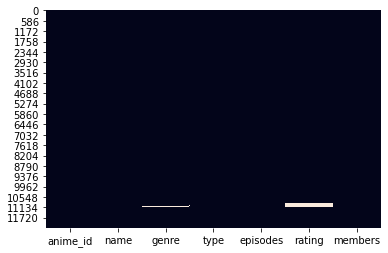

In [9]:
sns.heatmap(animes.isnull(),cbar=False)

In [10]:
animes.dropna(inplace=True)

C:\Users\hshri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

Text(0.5, 1.0, 'Most Viewed Anime')

Text(0.5, 0, 'Types')

Text(0, 0.5, 'Number of Views with Reviews')

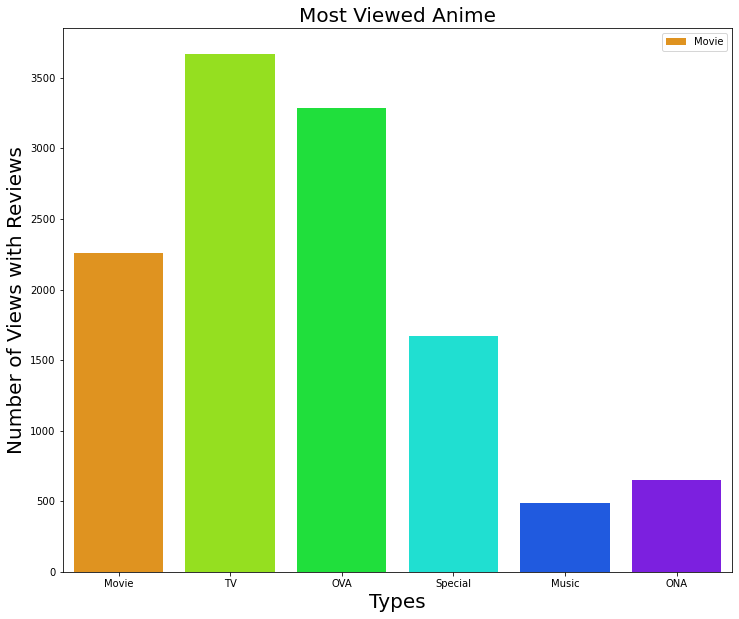

In [11]:
# PLOT them
fig = plt.figure(figsize=(12,10))
sns.countplot(animes['type'], palette='gist_rainbow')
plt.title("Most Viewed Anime", fontsize=20)
plt.xlabel("Types", fontsize=20)
plt.ylabel("Number of Views with Reviews", fontsize = 20)
plt.legend(animes['type'])
plt.show()

In [12]:
len(animes['anime_id'].unique())

12017

In [13]:
import statistics
ratings_per_user = ratings.groupby('user_id')['rating'].count()
statistics.mean(ratings_per_user.tolist())

91.05228448275862

In [14]:
ratings_per_anime = ratings.groupby('anime_id')['rating'].count()
statistics.mean(ratings_per_anime.tolist())


638.4484182953859

In [15]:
# counts of ratings per anime as a df
ratings_per_anime_df = pd.DataFrame(ratings_per_anime)
# remove if < 1000 ratings
filtered_ratings_per_anime_df = ratings_per_anime_df[ratings_per_anime_df.rating >= 1000]
# build a list of anime_ids to keep
popular_anime = filtered_ratings_per_anime_df.index.tolist()

In [16]:
# counts ratings per user as a df
ratings_per_user_df = pd.DataFrame(ratings_per_user)
# remove if < 500
filtered_ratings_per_user_df = ratings_per_user_df[ratings_per_user_df.rating >= 500]
# build a list of user_ids to keep
prolific_users = filtered_ratings_per_user_df.index.tolist()

In [17]:
filtered_ratings = ratings[ratings.anime_id.isin(popular_anime)]
filtered_ratings = ratings[ratings.user_id.isin(prolific_users)]
len(filtered_ratings)

1005314

## Item Based

The concept in this case is to find similar movies instead of similar users and then recommending similar movies to that ‘A’ has had in his/her past preferences. This is executed by finding every pair of items that were rated/viewed/liked/clicked by the same user, then measuring the similarity of those rated/viewed/liked/clicked across all user who rated/viewed/liked/clicked both, and finally recommending them based on similarity scores.

In [16]:
final_dataset = filtered_ratings.pivot_table(index='anime_id', columns='user_id', values='rating')
final_dataset.reset_index(inplace=True)
# replace NaN values with 0
final_dataset = final_dataset.fillna(0)
# display the top few rows
final_dataset.head()

user_id,anime_id,226,271,294,392,446,478,661,741,771,...,73234,73272,73286,73340,73356,73362,73378,73395,73499,73502
0,1,8.0,0.0,7.0,7.0,9.0,0.0,0.0,10.0,8.0,...,0.0,9.0,10.0,9.0,7.0,10.0,9.0,10.0,9.0,0.0
1,5,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,7.0,...,0.0,9.0,10.0,0.0,0.0,10.0,9.0,9.0,0.0,0.0
2,6,8.0,0.0,0.0,7.0,9.0,0.0,0.0,0.0,8.0,...,0.0,10.0,9.0,0.0,9.0,0.0,0.0,10.0,9.0,0.0
3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,9.0
4,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
final_dataset.reset_index(drop=True,inplace=True)
final_dataset.head()

user_id,anime_id,226,271,294,392,446,478,661,741,771,...,73234,73272,73286,73340,73356,73362,73378,73395,73499,73502
0,1,8.0,0.0,7.0,7.0,9.0,0.0,0.0,10.0,8.0,...,0.0,9.0,10.0,9.0,7.0,10.0,9.0,10.0,9.0,0.0
1,5,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,7.0,...,0.0,9.0,10.0,0.0,0.0,10.0,9.0,9.0,0.0,0.0
2,6,8.0,0.0,0.0,7.0,9.0,0.0,0.0,0.0,8.0,...,0.0,10.0,9.0,0.0,9.0,0.0,0.0,10.0,9.0,0.0
3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,9.0
4,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KNN method


In [18]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(final_dataset.values)
distances, indices = knn.kneighbors(final_dataset.values, n_neighbors=3)

NearestNeighbors(algorithm='brute', metric='cosine')

In [19]:
distances

array([[0.00000000e+00, 1.90718520e-01, 2.31876735e-01],
       [6.66133815e-16, 1.90718520e-01, 3.33684393e-01],
       [7.77156117e-16, 2.31876735e-01, 3.09920494e-01],
       ...,
       [0.00000000e+00, 2.10342848e-08, 2.20289390e-08],
       [0.00000000e+00, 2.59679321e-08, 3.97925715e-08],
       [0.00000000e+00, 3.55909302e-10, 1.93953587e-09]])

In [20]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [21]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [22]:
def get_anime_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = animes[animes['name'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['anime_id']
        movie_idx = final_dataset[final_dataset['anime_id'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['anime_id']
            idx = animes[animes['anime_id'] == movie_idx].index
            recommend_frame.append({'Title':animes.iloc[idx]['name'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [23]:
get_anime_recommendation('Kimi no Na wa')

,Title,Distance
1,Chikyuu ga Ugoita Hi,0.000007
2,One Piece Film: Gold,0.000007
3,Eightman After,0.000007
4,Samero,0.000007
5,Mudai,0.000007
6,Betterman,0.000007
7,Kizumonogatari II: Nekketsu-hen,0.000007
8,Andersen Monogatari,0.000007
9,Dore Dore no Uta,0.000007
10,Koe no Katachi,0.000006


## Using Cosine similarity 

In [37]:
final_dataset = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating')
final_dataset.reset_index(inplace=True)
# replace NaN values with 0
final_dataset = final_dataset.fillna(0)
# display the top few rows
final_dataset.head()

anime_id,user_id,1,5,6,7,8,15,16,17,18,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
0,226,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,294,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,392,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,446,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
final_dataset.iloc[:, 1:] = (final_dataset.iloc[:, 1:]-final_dataset.iloc[:, 1:].min())/(final_dataset.iloc[:, 1:].max()-final_dataset.iloc[:, 1:].min())
final_dataset.shape
final_dataset.head()
temp_df = final_dataset.iloc[:, 1:]
temp_df.head()

(1365, 9592)

anime_id,user_id,1,5,6,7,8,15,16,17,18,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
0,226,0.8,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,294,0.7,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,392,0.7,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,446,0.9,0.8,0.9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
0,0.8,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.7,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.7,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.9,0.8,0.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
temp_df.columns.name = None
temp_df.head()

,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
0,0.8,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.7,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.7,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.9,0.8,0.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
ItemItemSim = temp_df.transpose().dot(temp_df) 

# Setting item(i) - item(i) similarity as 0
ItemItemSim.values[[np.arange(ItemItemSim.shape[0])]*2] = 0

ItemItemSim = (ItemItemSim-ItemItemSim.min())/(ItemItemSim.max()-ItemItemSim.min())
ItemItemSim.shape
ItemItemSim.head()

<ipython-input-40-93f8b2f75b84>:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ItemItemSim.values[[np.arange(ItemItemSim.shape[0])]*2] = 0


(9591, 9591)

,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
1,0.000000,1.000000,0.909513,0.914173,0.733935,0.719187,0.807644,0.707475,0.831133,0.839073,...,0.483903,0.0,0.649958,0.0,0.625210,0.549550,0.379032,0.860000,0.620253,0.454545
5,0.703837,0.000000,0.618985,0.637292,0.451364,0.427219,0.533848,0.455562,0.530954,0.561942,...,0.414487,0.8,0.431854,0.0,0.475630,0.337838,0.209677,0.860000,0.556962,0.409091
6,0.749433,0.724655,0.000000,0.846248,0.789613,0.680205,0.649199,0.722190,0.732440,0.709554,...,0.377264,0.0,0.411192,0.0,0.532773,0.684685,0.183468,0.846667,0.550633,0.690909
7,0.296336,0.293510,0.332913,0.000000,0.440361,0.238170,0.292983,0.275456,0.258459,0.314339,...,0.118712,0.0,0.107477,0.0,0.000000,0.157658,0.096774,0.746667,0.221519,0.000000
8,0.057774,0.050481,0.075434,0.106937,0.000000,0.129338,0.072510,0.181283,0.102217,0.075240,...,0.000000,0.0,0.024182,0.0,0.000000,0.112613,0.000000,0.000000,0.158228,0.000000


In [41]:
# Create a placeholder items for closest neighbours to an item

ItemNeighboursName = pd.DataFrame(index=ItemItemSim.columns,columns=range(1,9592))
# ItemNeighboursName.head()

for i in range(0,len(ItemItemSim.columns)): 
    ItemNeighboursName.iloc[i,:9592] = ItemItemSim.iloc[0:,i].sort_values(ascending=False)[:9592].index
ItemNeighboursName.shape
ItemNeighboursName.head()

(9591, 9591)

,1,2,3,4,5,6,7,8,9,10,...,9582,9583,9584,9585,9586,9587,9588,9589,9590,9591
1,1575,2904,2001,1535,5114,849,4224,9253,5081,6547,...,9822,30764,9862,9959,9993,10115,10118,10194,10342,1
5,1,1575,2001,1535,2904,849,5114,5081,4224,121,...,5558,12971,3362,5554,13047,5553,5552,5551,5548,8745
6,1575,2904,2001,5114,1,1535,121,4224,849,9253,...,30065,3497,23475,30070,30071,30072,18197,8495,3006,8366
7,1575,2904,2025,1535,226,121,1,30,4224,889,...,3839,28809,2537,6397,11268,19213,19217,28765,17965,34475
8,1575,2904,1535,2001,356,355,71,121,889,2787,...,10241,10246,10256,10259,10261,10262,10263,10270,10280,34475


In [42]:
ItemNeighboursValue = pd.DataFrame(index=ItemItemSim.columns,columns=range(1,9592))
# ItemNeighboursName.head()

for i in range(0,len(ItemItemSim.columns)): 
    ItemNeighboursValue.iloc[i,:9592] = ItemItemSim.iloc[0:,i].sort_values(ascending=False)[:9592]
ItemNeighboursValue.head()

,1,2,3,4,5,6,7,8,9,10,...,9582,9583,9584,9585,9586,9587,9588,9589,9590,9591
1,1.0,0.954145,0.950247,0.929996,0.91191,0.905621,0.904166,0.90084,0.899142,0.894223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.905215,0.874548,0.857294,0.855694,0.83369,0.80797,0.806985,0.804253,0.801398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.959003,0.931904,0.920046,0.909513,0.900788,0.894124,0.892232,0.879323,0.873457,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.957354,0.922029,0.921387,0.919838,0.919838,0.914173,0.90931,0.906958,0.901293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.947843,0.912192,0.901408,0.884463,0.880282,0.868618,0.858275,0.848151,0.830986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
top_anime = ratings[ratings['user_id']==17].sort_values('rating', ascending=False).reset_index()
top_anime.drop('index', inplace=True, axis=1)
top_anime

,user_id,anime_id,rating,name,genre,type,episodes,rating_y,members
0,17,11741,10,Fate/Zero 2nd Season,"Action, Fantasy, Supernatural, Thriller",TV,12,8.73,340973
1,17,5114,10,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,17,22135,10,Ping Pong The Animation,"Psychological, Seinen, Sports",TV,11,8.67,97187
3,17,4181,10,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
4,17,32,10,Neon Genesis Evangelion: The End of Evangelion,"Dementia, Drama, Mecha, Psychological, Sci-Fi",Movie,1,8.45,215630
...,...,...,...,...,...,...,...,...,...
402,17,21421,2,Mahou Shoujo Taisen,Magic,TV,26,5.85,12783
403,17,3287,2,Tenkuu Danzai Skelter+Heaven,"Mecha, Sci-Fi",OVA,1,2.00,7680
404,17,21821,1,Fuuun Ishin Dai☆Shogun,"Action, Historical, Mecha",TV,12,5.82,15758
405,17,19315,1,Pupa,"Fantasy, Horror, Psychological",TV,12,3.82,83652


In [44]:
user_item_value = ItemNeighboursValue.loc[top_anime['anime_id']]
user_item_value.shape
user_item_value.head()

(407, 9591)

,1,2,3,4,5,6,7,8,9,10,...,9582,9583,9584,9585,9586,9587,9588,9589,9590,9591
11741,1.0,0.905446,0.904136,0.889648,0.885965,0.861665,0.857262,0.846083,0.838256,0.826991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5114,1.0,0.974483,0.945294,0.929087,0.926608,0.911502,0.896436,0.887768,0.875521,0.873043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22135,1.0,0.93507,0.934451,0.927695,0.921764,0.908097,0.90098,0.896287,0.890923,0.878597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4181,1.0,0.911882,0.908945,0.899916,0.87874,0.853399,0.849958,0.832909,0.824462,0.817023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,1.0,0.936324,0.912772,0.898257,0.878797,0.862817,0.862389,0.859559,0.856628,0.856078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in top_anime.index:
    count = top_anime['rating'][i]
    curr_car = top_anime['anime_id'][i]
    user_item_value.loc[[curr_car]]=user_item_value.loc[[curr_car]].apply(lambda x: x*count)
user_item_value.head()

In [ ]:
user_item_value = user_item_value/user_item_value.sum().sum()
user_item_value.head()

In [ ]:
user_item_name = ItemNeighboursName.loc[top_anime['anime_id']]
user_item_name.shape
user_item_name.head()

In [ ]:
recommendaion = {}
for i in range(len(user_item_name.index)):
    for j in range(len(user_item_name.columns)):
        if user_item_name.iloc[i,j] in recommendaion.keys():
            recommendaion[user_item_name.iloc[i,j]]=recommendaion[user_item_name.iloc[i,j]] + user_item_value.iloc[i,j]
        else:
            recommendaion[user_item_name.iloc[i,j]]=user_item_value.iloc[i,j]
recommendaion
recommendaion={k: v for k, v in sorted(recommendaion.items(), key=lambda item: item[1], reverse=True)}
recommendaion

In [30]:
# Comparing top favourite and recommender animes for user X

import itertools
n = top_anime.shape[0]
top_anime_recommender={}
top_anime_recommender = dict(list(recommendaion.items())[0: n])
top_anime_recommender

{6547: 0.0012819024764039225,
 1575: 0.0012703619833705755,
 9253: 0.0012701789680625744,
 4224: 0.0012541668150494747,
 5081: 0.0012392306438318297,
 2904: 0.0012284557123795998,
 16498: 0.0012057206901682888,
 1535: 0.0011879840982527482,
 5114: 0.0011758038914202666,
 19815: 0.0011756407045481398,
 849: 0.0011703930081916412,
 2001: 0.0011675728213356058,
 11757: 0.0011670317650878345,
 6746: 0.0011555305090452876,
 2167: 0.0011448161486853241,
 10087: 0.001120542719349383,
 9989: 0.0011179750296601196,
 4181: 0.0011162710783251665,
 15809: 0.001114984839401621,
 9756: 0.0010937388426948314,
 14741: 0.001079013586446113,
 226: 0.0010735687279603016,
 11741: 0.0010734501443947465,
 4654: 0.0010659616537929523,
 13601: 0.0010595177710172549,
 30276: 0.001059324739121285,
 8525: 0.0010572505101961631,
 8074: 0.0010563048296855654,
 14813: 0.0010498469328866244,
 11111: 0.0010443059015269786,
 10719: 0.0010418419765524664,
 8769: 0.001040718190760378,
 11597: 0.001037729696511276,
 121:

In [31]:
# Creating dataframe for comparision

compare = pd.DataFrame()
compare['top_anime'] = top_anime['anime_id']
compare['recommended_anime'] = top_anime_recommender.keys()
compare['score'] = top_anime_recommender.values()
compare

,top_anime,recommended_anime,score
0,11741,6547,0.001282
1,5114,1575,0.001270
2,22135,9253,0.001270
3,4181,4224,0.001254
4,32,5081,0.001239
...,...,...,...
402,21421,5667,0.000563
403,3287,14829,0.000563
404,21821,8557,0.000563
405,19315,20021,0.000562


In [40]:
compare=compare.replace({"top_anime": adict})
compare=compare.replace({"recommended_anime": adict})
compare

,top_anime,recommended_anime,score
0,Fate/Zero 2nd Season,Angel Beats!,0.001282
1,Fullmetal Alchemist: Brotherhood,Code Geass: Hangyaku no Lelouch,0.001270
2,Ping Pong The Animation,Steins;Gate,0.001270
3,Clannad: After Story,Toradora!,0.001254
4,Neon Genesis Evangelion: The End of Evangelion,Bakemonogatari,0.001239
...,...,...,...
402,Mahou Shoujo Taisen,To LOVE-Ru OVA,0.000563
403,Tenkuu Danzai Skelter+Heaven,Fate/kaleid liner Prisma☆Illya,0.000563
404,Fuuun Ishin Dai☆Shogun,Shinryaku! Ika Musume,0.000563
405,Pupa,Sword Art Online: Extra Edition,0.000562


In [41]:
# Validating for user X

l1 = compare['top_anime'].to_list()
l2 = compare['recommended_anime'].to_list()

ct=0
for i in l1:
    for j in l2:
        if i == j:
            ct+=1
ct/compare.shape[0]

0.5036855036855037

## User Based

he basic idea here is to find users that have similar past preference patterns as the user ‘A’ has had and then recommending him or her items liked by those similar users which ‘A’ has not encountered yet. This is achieved by making a matrix of items each user has rated/viewed/liked/clicked depending upon the task at hand, and then computing the similarity score between the users and finally recommending items that the concerned user isn’t aware of but users similar to him/her are and liked it.

In [18]:
data = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating')
# replace NaN values with 0
data = data.fillna(0)
# display the top few rows
data.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
226,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
data.columns.name = None
data.head()

,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
226,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data.reset_index(inplace=True)
data.head()

,user_id,1,5,6,7,8,15,16,17,18,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
0,226,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,294,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,392,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,446,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
data=data.astype(float)

In [22]:
data.iloc[:, 1:] = (data.iloc[:, 1:]-data.iloc[:, 1:].min())/(data.iloc[:, 1:].max()-data.iloc[:, 1:].min())
data.head()

,user_id,1,5,6,7,8,15,16,17,18,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
0,226.0,0.8,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,271.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,294.0,0.7,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,392.0,0.7,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,446.0,0.9,0.8,0.9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
users = data['user_id'].tolist()
len(users)
users[:5]

data.drop('user_id', axis=1, inplace=True)
data.shape
data.head()

1365

[226.0, 271.0, 294.0, 392.0, 446.0]

(1365, 9591)

,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
0,0.8,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.7,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.7,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.9,0.8,0.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(data)
cosine_sim

array([[1.        , 0.30853835, 0.36894572, ..., 0.36097341, 0.33582949,
        0.30605943],
       [0.30853835, 1.        , 0.26670808, ..., 0.28780461, 0.28524421,
        0.22648071],
       [0.36894572, 0.26670808, 1.        , ..., 0.34823857, 0.41071847,
        0.37709376],
       ...,
       [0.36097341, 0.28780461, 0.34823857, ..., 1.        , 0.34586073,
        0.31842091],
       [0.33582949, 0.28524421, 0.41071847, ..., 0.34586073, 1.        ,
        0.42111324],
       [0.30605943, 0.22648071, 0.37709376, ..., 0.31842091, 0.42111324,
        1.        ]])

In [25]:
method_2 = pd.DataFrame(cosine_sim, index=(int(users) for users in users), columns=(int(users) for users in users)) 
np.fill_diagonal(method_2.values, 0) # Making Diagonal as 0
method_2.shape
method_2.head()

(1365, 1365)

,226,271,294,392,446,478,661,741,771,786,...,73234,73272,73286,73340,73356,73362,73378,73395,73499,73502
226,0.000000,0.308538,0.368946,0.367366,0.476972,0.350518,0.338081,0.452833,0.396991,0.384253,...,0.287981,0.360673,0.412760,0.433850,0.308988,0.287579,0.453145,0.360973,0.335829,0.306059
271,0.308538,0.000000,0.266708,0.219140,0.339590,0.373582,0.303495,0.343486,0.355854,0.490810,...,0.268164,0.157558,0.305692,0.287438,0.096157,0.344646,0.355336,0.287805,0.285244,0.226481
294,0.368946,0.266708,0.000000,0.356885,0.385890,0.393080,0.358268,0.418610,0.360543,0.469685,...,0.357750,0.281472,0.361786,0.412313,0.352832,0.339857,0.450540,0.348239,0.410718,0.377094
392,0.367366,0.219140,0.356885,0.000000,0.394244,0.305698,0.291322,0.315031,0.395293,0.313320,...,0.282831,0.338339,0.340816,0.464146,0.320988,0.264834,0.433286,0.358676,0.302884,0.241946
446,0.476972,0.339590,0.385890,0.394244,0.000000,0.375735,0.403338,0.428575,0.402655,0.429063,...,0.353104,0.350767,0.400740,0.429762,0.312824,0.290560,0.479518,0.399109,0.338612,0.334421


In [26]:
# Lets receommend for user 226

# Making dictionary having similar_user->similariy for user X

curr_user = {}
col = method_2.columns.tolist()
val = method_2.loc[226].tolist()

for i in range(0, len(col)):
    curr_user[col[i]]=val[i]
len(curr_user)
curr_user

1365

{226: 0.0,
 271: 0.3085383501450467,
 294: 0.3689457205465156,
 392: 0.3673663059025944,
 446: 0.476971627362767,
 478: 0.3505182509033089,
 661: 0.3380811786330729,
 741: 0.4528331003380913,
 771: 0.39699089898191564,
 786: 0.38425329033180855,
 958: 0.2922473393292904,
 1019: 0.4249328147644637,
 1103: 0.40032355637772365,
 1145: 0.3668302670724487,
 1176: 0.4002054527963585,
 1191: 0.3457136815516288,
 1287: 0.5029589799728486,
 1344: 0.4414907206327999,
 1456: 0.3825507266631763,
 1497: 0.4018758078506073,
 1504: 0.41498136327207186,
 1522: 0.44431389790345943,
 1530: 0.4348487980602157,
 1720: 0.257940957177595,
 1822: 0.23729853930022932,
 1984: 0.2989517744929272,
 2200: 0.25924281993388004,
 2273: 0.2090848579520731,
 2297: 0.5326970766326424,
 2378: 0.3974798463603388,
 2632: 0.3855826261289993,
 2695: 0.25756075276376805,
 2701: 0.39278793819873214,
 2810: 0.4677491842649514,
 2820: 0.3474772791553928,
 2951: 0.37126867690429566,
 3040: 0.48081874965362853,
 3117: 0.436657228

In [27]:
# Sorting a dictionary in Python 2

import operator
import collections

sorted_x = sorted(curr_user.items(), key=lambda kv: kv[1], reverse=True)
# sorted_x

dic = dict(sorted_x)
dic
# sorted_dict = collections.OrderedDict(sorted_x)
# sorted_dict

{30773: 0.598062551400389,
 39021: 0.594754665007366,
 45603: 0.5856241250135007,
 24130: 0.5792220083187873,
 17479: 0.578364244060158,
 27799: 0.5770372173389057,
 26489: 0.574308119719817,
 48648: 0.5738628122929132,
 53419: 0.5723035055485145,
 22642: 0.5710678099229307,
 36957: 0.5710073569981432,
 8820: 0.5692924937876549,
 39602: 0.5658573191498775,
 25968: 0.5620802452495833,
 68925: 0.55920367842188,
 39913: 0.5586517755724546,
 44910: 0.5584878808436172,
 21206: 0.5583998840130924,
 21588: 0.5564638218231751,
 53645: 0.5553735484428701,
 48845: 0.5533311823159192,
 54883: 0.5519773167449229,
 56120: 0.5516691766508559,
 43954: 0.5514751746938182,
 65588: 0.5512287773994428,
 15946: 0.5510020365273309,
 3203: 0.5497573517747724,
 6474: 0.5483248764208639,
 47238: 0.5476259307254564,
 22154: 0.5458253709689302,
 44835: 0.545195919729219,
 68522: 0.5450869730885364,
 32708: 0.5450766882061319,
 41714: 0.545071777926086,
 72997: 0.5440219071675546,
 55244: 0.5427307399895551,
 64

In [28]:
# Taking top 10 users

import itertools
n = 10
top_dic={}
top_dic = dict(list(dic.items())[0: n])
top_dic

{30773: 0.598062551400389,
 39021: 0.594754665007366,
 45603: 0.5856241250135007,
 24130: 0.5792220083187873,
 17479: 0.578364244060158,
 27799: 0.5770372173389057,
 26489: 0.574308119719817,
 48648: 0.5738628122929132,
 53419: 0.5723035055485145,
 22642: 0.5710678099229307}

In [29]:
# Top anime for each similar_user

for key, value in top_dic.items():
    top_anime = ratings[ratings['user_id']==key].sort_values('rating', ascending=False).reset_index()
    top_anime.drop('index', inplace=True, axis=1)
    top_anime

,user_id,anime_id,rating,name,genre,type,episodes,rating_y,members
0,30773,5941,10,Cross Game,"Comedy, Drama, Romance, School, Sports",TV,50,8.53,53108
1,30773,16782,10,Kotonoha no Niwa,"Drama, Psychological, Romance, Slice of Life",Movie,1,8.35,189741
2,30773,857,10,Air Gear,"Action, Comedy, Ecchi, Shounen, Sports",TV,25,7.69,194611
3,30773,2904,10,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888
4,30773,9253,10,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
...,...,...,...,...,...,...,...,...,...
636,30773,3328,4,School Days: Magical Heart Kokoro-chan,"Comedy, Ecchi, Magic",OVA,1,5.86,28812
637,30773,470,4,Okusama wa Joshikousei (TV),"Comedy, Drama, Romance, Slice of Life",TV,13,6.45,14010
638,30773,19769,4,Mahou Sensou,"Action, Fantasy, Magic",TV,12,6.18,104192
639,30773,668,3,Koi Koi 7,"Comedy, Harem, Romance",TV,13,5.96,10399


,user_id,anime_id,rating,name,genre,type,episodes,rating_y,members
0,39021,7674,10,Bakuman.,"Comedy, Romance, Shounen",TV,25,8.35,246899
1,39021,12365,10,Bakuman. 3rd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.71,133620
2,39021,5630,10,Higashi no Eden,"Action, Comedy, Drama, Mystery, Romance, Sci-F...",TV,11,8.03,276593
3,39021,10030,10,Bakuman. 2nd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.53,151561
4,39021,17265,10,Log Horizon,"Action, Adventure, Fantasy, Game, Magic, Shounen",TV,25,8.14,387100
...,...,...,...,...,...,...,...,...,...
665,39021,21167,5,Escha &amp; Logy no Atelier: Tasogare no Sora ...,Fantasy,TV,12,6.50,37885
666,39021,394,5,Ai Yori Aoshi: Enishi,"Comedy, Drama, Harem, Romance, Slice of Life",TV,12,7.25,37944
667,39021,53,5,Ai Yori Aoshi,"Comedy, Drama, Harem, Romance, Slice of Life",TV,24,7.24,66597
668,39021,19769,5,Mahou Sensou,"Action, Fantasy, Magic",TV,12,6.18,104192


,user_id,anime_id,rating,name,genre,type,episodes,rating_y,members
0,45603,7674,10,Bakuman.,"Comedy, Romance, Shounen",TV,25,8.35,246899
1,45603,17265,10,Log Horizon,"Action, Adventure, Fantasy, Game, Magic, Shounen",TV,25,8.14,387100
2,45603,5258,10,Hajime no Ippo: New Challenger,"Comedy, Drama, Shounen, Sports",TV,26,8.75,88995
3,45603,10030,10,Bakuman. 2nd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.53,151561
4,45603,21405,10,Bokura wa Minna Kawaisou,"Comedy, Romance, School, Slice of Life",TV,12,7.90,159793
...,...,...,...,...,...,...,...,...,...
669,45603,9750,5,Itsuka Tenma no Kuro Usagi,"Comedy, Ecchi, Romance, Shounen, Supernatural,...",TV,12,6.83,73555
670,45603,14073,5,Ebiten: Kouritsu Ebisugawa Koukou Tenmonbu,"Comedy, Ecchi, Parody, School, Shounen",ONA,10,6.34,16438
671,45603,24705,5,"Ore, Twintail ni Narimasu.","Action, Comedy, Fantasy, Romance, School, Shounen",TV,12,6.76,66868
672,45603,20931,5,Oneechan ga Kita,"Comedy, Slice of Life",TV,12,6.54,45457


,user_id,anime_id,rating,name,genre,type,episodes,rating_y,members
0,24130,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
1,24130,10800,10,Chihayafuru,"Drama, Game, Josei, Slice of Life, Sports",TV,25,8.32,158561
2,24130,22199,10,Akame ga Kill!,"Action, Adventure, Fantasy",TV,24,7.84,492133
3,24130,22729,10,Aldnoah.Zero,"Action, Mecha, Sci-Fi",TV,12,7.66,244193
4,24130,857,10,Air Gear,"Action, Comedy, Ecchi, Shounen, Sports",TV,25,7.69,194611
...,...,...,...,...,...,...,...,...,...
598,24130,133,6,Green Green,"Comedy, Ecchi, Romance, School, Slice of Life",TV,12,6.44,80562
599,24130,16742,6,Watashi ga Motenai no wa Dou Kangaetemo Omaera...,"Comedy, School, Shounen, Slice of Life",TV,12,7.29,257925
600,24130,21431,6,Gokukoku no Brynhildr,"Drama, Mystery, Sci-Fi, Seinen",TV,13,7.09,159899
601,24130,20533,5,Z/X: Ignition,"Adventure, Fantasy, Game, Sci-Fi",TV,12,6.68,24788


,user_id,anime_id,rating,name,genre,type,episodes,rating_y,members
0,17479,16706,10,Kami nomi zo Shiru Sekai: Megami-hen,"Comedy, Harem, Romance, Shounen, Supernatural",TV,12,8.30,142612
1,17479,30296,10,Rakudai Kishi no Cavalry,"Action, Ecchi, Fantasy, Romance, School",TV,12,7.78,188685
2,17479,23755,10,Nanatsu no Taizai,"Action, Adventure, Ecchi, Fantasy, Shounen, Su...",TV,24,8.42,331627
3,17479,16355,10,Dansai Bunri no Crime Edge,"Action, Fantasy, Romance, Seinen",TV,13,6.87,60465
4,17479,20785,10,Mahouka Koukou no Rettousei,"Magic, Romance, School, Sci-Fi, Supernatural",TV,26,7.76,285317
...,...,...,...,...,...,...,...,...,...
535,17479,17879,6,Tamako Market Specials,Comedy,Special,6,6.29,12141
536,17479,79,6,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772
537,17479,16199,6,Girls und Panzer: Shoukai Shimasu!,"Military, School",Special,2,6.59,11042
538,17479,4752,5,Vampire Knight Guilty,"Drama, Mystery, Romance, Shoujo, Supernatural,...",TV,13,7.53,198492


,user_id,anime_id,rating,name,genre,type,episodes,rating_y,members
0,27799,1575,10,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
1,27799,2904,10,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888
2,27799,9253,9,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
3,27799,10087,9,Fate/Zero,"Action, Fantasy, Supernatural",TV,13,8.51,453630
4,27799,16762,9,Mirai Nikki Redial,"Action, Psychological, Shounen, Supernatural",OVA,1,7.71,135604
...,...,...,...,...,...,...,...,...,...
523,27799,11005,4,Holy Knight,"Ecchi, Fantasy, School, Seinen, Supernatural, ...",OVA,2,6.28,20589
524,27799,12783,4,Sora no Otoshimono Final: Eternal My Master,"Comedy, Ecchi, Harem, Sci-Fi, Shounen, Superna...",Movie,1,6.89,48730
525,27799,32438,4,Mayoiga,"Drama, Horror, Mystery, Psychological",TV,12,5.80,117090
526,27799,8424,4,MM!,"Comedy, Ecchi, Harem, School",TV,12,7.36,129672


,user_id,anime_id,rating,name,genre,type,episodes,rating_y,members
0,26489,627,10,Major S1,"Comedy, Drama, Shounen, Sports",TV,26,8.42,41061
1,26489,22535,10,Kiseijuu: Sei no Kakuritsu,"Action, Drama, Horror, Psychological, Sci-Fi, ...",TV,24,8.59,425457
2,26489,16498,10,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
3,26489,21185,10,Baby Steps,"Romance, School, Shounen, Sports",TV,25,7.96,59818
4,26489,19815,10,No Game No Life,"Adventure, Comedy, Ecchi, Fantasy, Game, Super...",TV,12,8.47,602291
...,...,...,...,...,...,...,...,...,...
561,26489,4896,4,Umineko no Naku Koro ni,"Horror, Mystery, Psychological, Supernatural",TV,26,7.34,126865
562,26489,48,4,.hack//Sign,"Adventure, Fantasy, Game, Magic, Mystery, Sci-Fi",TV,26,7.14,110304
563,26489,33421,4,Hitori no Shita: The Outcast,"Action, Super Power, Supernatural",TV,12,6.67,36343
564,26489,32595,4,Seisen Cerberus: Ryuukoku no Fatalités,"Adventure, Fantasy",TV,13,5.80,49394


,user_id,anime_id,rating,name,genre,type,episodes,rating_y,members
0,48648,27821,10,Fate/stay night: Unlimited Blade Works - Prologue,"Action, Fantasy, Magic, Shounen, Supernatural",Special,1,8.32,106382
1,48648,19815,10,No Game No Life,"Adventure, Comedy, Ecchi, Fantasy, Game, Super...",TV,12,8.47,602291
2,48648,22297,10,Fate/stay night: Unlimited Blade Works,"Action, Fantasy, Magic, Shounen, Supernatural",TV,12,8.42,267484
3,48648,1604,10,Katekyo Hitman Reborn!,"Action, Comedy, Shounen, Super Power",TV,203,8.37,258103
4,48648,28121,10,Dungeon ni Deai wo Motomeru no wa Machigatteir...,"Action, Adventure, Comedy, Fantasy, Romance",TV,13,7.88,336349
...,...,...,...,...,...,...,...,...,...
520,48648,28791,6,Gunslinger Stratos: The Animation,"Action, Sci-Fi",TV,12,6.23,47587
521,48648,25429,6,Isuca,"Action, Comedy, Ecchi, Romance, School, Seinen...",TV,10,6.17,63638
522,48648,934,6,Higurashi no Naku Koro ni,"Horror, Mystery, Psychological, Supernatural, ...",TV,26,8.17,359494
523,48648,6610,6,Ibara no Ou,"Action, Mystery, Sci-Fi, Thriller",Movie,1,7.24,38670


,user_id,anime_id,rating,name,genre,type,episodes,rating_y,members
0,53419,15417,10,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
1,53419,31043,10,Boku dake ga Inai Machi,"Mystery, Psychological, Seinen, Supernatural",TV,12,8.65,402381
2,53419,30503,10,Noragami Aragoto,"Action, Adventure, Shounen, Supernatural",TV,13,8.48,299434
3,53419,12365,10,Bakuman. 3rd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.71,133620
4,53419,22297,10,Fate/stay night: Unlimited Blade Works,"Action, Fantasy, Magic, Shounen, Supernatural",TV,12,8.42,267484
...,...,...,...,...,...,...,...,...,...
799,53419,18247,5,IS: Infinite Stratos 2,"Action, Comedy, Harem, Mecha, Sci-Fi",TV,12,6.82,146979
800,53419,3655,5,Nabari no Ou,"Action, Comedy, Drama, Fantasy, Shounen, Super...",TV,26,7.44,107384
801,53419,19315,4,Pupa,"Fantasy, Horror, Psychological",TV,12,3.82,83652
802,53419,5112,4,Akikan!,"Comedy, Ecchi, Fantasy, Romance",TV,12,6.40,74097


,user_id,anime_id,rating,name,genre,type,episodes,rating_y,members
0,22642,6547,9,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
1,22642,5114,9,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,22642,11235,9,Amagami SS+ Plus,"Comedy, Romance, School, Slice of Life",TV,13,7.61,73813
3,22642,1589,9,Bartender,"Drama, Seinen, Slice of Life",TV,11,7.50,44394
4,22642,10620,9,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
...,...,...,...,...,...,...,...,...,...
962,22642,4066,3,Tytania,"Adventure, Military, Psychological, Romance, S...",TV,26,6.93,13363
963,22642,1818,3,Claymore,"Action, Adventure, Demons, Fantasy, Shounen, S...",TV,26,7.92,316853
964,22642,10187,3,HenSemi (TV),"Comedy, Ecchi, Seinen",TV,13,6.66,27878
965,22642,4535,3,Candy Boy: Nonchalant Talk of the Certain Twin...,"Romance, School, Shoujo Ai",ONA,7,7.08,43338


In [30]:
# Aggregating Score of each anime

recommendation = {}

for key, value in top_dic.items():
    top_anime = ratings[ratings['user_id']==key].sort_values('rating', ascending=False).reset_index()
    top_anime.drop('index', inplace=True, axis=1)
    for i in top_anime.index:
        if top_anime['anime_id'][i] in recommendation.keys():
            recommendation[top_anime['anime_id'][i]] = recommendation[top_anime['anime_id'][i]] + (top_anime['rating'][i]*value)
        else:
            recommendation[top_anime['anime_id'][i]] = (top_anime['rating'][i]*value)
recommendation

{5941: 21.18718357665654,
 16782: 16.358732912364005,
 857: 49.382432864499705,
 2904: 54.56596992398715,
 9253: 47.09403986406593,
 4181: 38.40826924807543,
 11061: 43.11955270999157,
 14833: 46.47935614712484,
 6675: 10.549167993387336,
 6594: 44.024387432550306,
 28121: 50.538905923814674,
 4565: 5.98062551400389,
 4107: 5.98062551400389,
 6746: 44.74874135817564,
 6547: 51.092980095197,
 4224: 51.127613122778506,
 2001: 42.44575206883046,
 10793: 49.92778808410381,
 205: 24.436166625823134,
 12365: 44.817964254464,
 13599: 28.572949788016082,
 12859: 5.98062551400389,
 17074: 29.716572375652163,
 16918: 39.44162800576375,
 1575: 54.56682768824577,
 22535: 51.69466136154498,
 23277: 40.749574648733834,
 1698: 37.286888922044035,
 30240: 28.632007778445175,
 9062: 19.195916634288974,
 28805: 15.290503160497737,
 813: 27.486712217161323,
 5341: 35.92178182339091,
 13659: 34.41744864562056,
 9989: 48.78035633901034,
 11111: 38.42664996085154,
 16668: 37.78377587522286,
 11665: 23.20300

In [31]:
# Sorting recommendation

recommendation_sorted = sorted(recommendation.items(), key=lambda kv: kv[1], reverse=True)
# sorted_x

recommendation_sorted = dict(recommendation_sorted)
recommendation_sorted

{1575: 54.56682768824577,
 2904: 54.56596992398715,
 19815: 52.24285645908168,
 22535: 51.69466136154498,
 4224: 51.127613122778506,
 6547: 51.092980095197,
 226: 51.07386105041446,
 28121: 50.538905923814674,
 17265: 50.519415513310484,
 16498: 50.509820841421714,
 16706: 49.932024184716546,
 10793: 49.92778808410381,
 20785: 49.92718204908616,
 11757: 49.918496142199274,
 28907: 49.915732562445456,
 10620: 49.90973940052994,
 857: 49.382432864499705,
 5081: 49.33716538992916,
 28171: 49.33243167813877,
 9989: 48.78035633901034,
 13759: 48.77076558758191,
 4654: 48.75392965867162,
 6956: 48.75120056105253,
 2966: 48.18118926747191,
 17895: 48.176479984500986,
 5114: 48.17000266235526,
 7054: 48.16350491959153,
 30276: 48.05614630297326,
 16011: 47.61171486160676,
 8074: 47.60388739329842,
 12293: 47.59065710740381,
 1195: 47.57882988993232,
 1840: 47.56550927046734,
 23273: 47.103859055862614,
 9253: 47.09403986406593,
 11499: 47.03352112586126,
 18897: 47.0266827978353,
 15315: 47.02

In [32]:
# Get top animes for user X (X=16)

top_anime = ratings[ratings['user_id']==226].sort_values('rating', ascending=False).reset_index()
top_anime.drop('index', inplace=True, axis=1)
top_anime

,user_id,anime_id,rating,name,genre,type,episodes,rating_y,members
0,226,245,10,Great Teacher Onizuka,"Comedy, Drama, School, Shounen, Slice of Life",TV,43,8.77,268487
1,226,30123,10,Akagami no Shirayuki-hime,"Drama, Fantasy, Romance, Shoujo",TV,12,7.93,157551
2,226,22199,10,Akame ga Kill!,"Action, Adventure, Fantasy",TV,24,7.84,492133
3,226,6205,10,Kämpfer,"Action, Comedy, Ecchi, Romance, School, Shoujo...",TV,12,6.73,146631
4,226,22319,10,Tokyo Ghoul,"Action, Drama, Horror, Mystery, Psychological,...",TV,12,8.07,618056
...,...,...,...,...,...,...,...,...,...
737,226,223,5,Dragon Ball,"Adventure, Comedy, Fantasy, Martial Arts, Shou...",TV,153,8.16,316102
738,226,2520,5,Dragon Ball Specials,"Comedy, Fantasy, Shounen, Super Power",Special,2,6.96,14575
739,226,246,5,Groove Adventure Rave,"Adventure, Comedy, Fantasy, Romance, Shounen",TV,51,7.45,56353
740,226,9736,4,Astarotte no Omocha!,"Comedy, Demons, Ecchi, Fantasy, Romance, Seinen",TV,12,6.81,73064


In [33]:
# Comparing top favourite and recommender animes for user X

import itertools
n = top_anime.shape[0]
top_anime_recommender={}
top_anime_recommender = dict(list(recommendation_sorted.items())[0: n])
top_anime_recommender

{1575: 54.56682768824577,
 2904: 54.56596992398715,
 19815: 52.24285645908168,
 22535: 51.69466136154498,
 4224: 51.127613122778506,
 6547: 51.092980095197,
 226: 51.07386105041446,
 28121: 50.538905923814674,
 17265: 50.519415513310484,
 16498: 50.509820841421714,
 16706: 49.932024184716546,
 10793: 49.92778808410381,
 20785: 49.92718204908616,
 11757: 49.918496142199274,
 28907: 49.915732562445456,
 10620: 49.90973940052994,
 857: 49.382432864499705,
 5081: 49.33716538992916,
 28171: 49.33243167813877,
 9989: 48.78035633901034,
 13759: 48.77076558758191,
 4654: 48.75392965867162,
 6956: 48.75120056105253,
 2966: 48.18118926747191,
 17895: 48.176479984500986,
 5114: 48.17000266235526,
 7054: 48.16350491959153,
 30276: 48.05614630297326,
 16011: 47.61171486160676,
 8074: 47.60388739329842,
 12293: 47.59065710740381,
 1195: 47.57882988993232,
 1840: 47.56550927046734,
 23273: 47.103859055862614,
 9253: 47.09403986406593,
 11499: 47.03352112586126,
 18897: 47.0266827978353,
 15315: 47.02

In [34]:
# Creating dataframe for comparision

compare = pd.DataFrame()
compare['top_anime'] = top_anime['anime_id']
compare['recommended_anime'] = top_anime_recommender.keys()
compare['score'] = top_anime_recommender.values()
compare

,top_anime,recommended_anime,score
0,245,1575,54.566828
1,30123,2904,54.565970
2,22199,19815,52.242856
3,6205,22535,51.694661
4,22319,4224,51.127613
...,...,...,...
737,223,10294,13.440505
738,2520,10716,13.440505
739,246,10717,13.440505
740,9736,23325,13.423973


In [35]:
compare=compare.replace({"top_anime": adict})
compare=compare.replace({"recommended_anime": adict})
compare

,top_anime,recommended_anime,score
0,Great Teacher Onizuka,Code Geass: Hangyaku no Lelouch,54.566828
1,Akagami no Shirayuki-hime,Code Geass: Hangyaku no Lelouch R2,54.565970
2,Akame ga Kill!,No Game No Life,52.242856
3,Kämpfer,Kiseijuu: Sei no Kakuritsu,51.694661
4,Tokyo Ghoul,Toradora!,51.127613
...,...,...,...
737,Dragon Ball,Towa no Quon 1: Utakata no Kaben,13.440505
738,Dragon Ball Specials,Towa no Quon 5: Souzetsu no Raifuku,13.440505
739,Groove Adventure Rave,Towa no Quon 6: Towa no Quon,13.440505
740,Astarotte no Omocha!,Shirogane no Ishi: Argevollen,13.423973


In [36]:
# Validating for user X

l1 = compare['top_anime'].to_list()
l2 = compare['recommended_anime'].to_list()

ct=0
for i in l1:
    for j in l2:
        if i == j:
            ct+=1
ct/compare.shape[0]

0.6657681940700808